##### PROCESS OF ANALYZING DATASET:

In [83]:
# import all the required library.  Make you have install before importing the library for use. 

import pandas as pd
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns 
plt.style.use('ggplot')
# pd.set_option('max_columns', 50) # this code is not working.



# reading the csv file and load into the dataframe called -> df. 
Stroke_Dataset_2016 = "C:/Diff/STROKEDatasets/2016_Mortality_Age35_Plus.csv"
Stroke_Dataset_2016 = pd.read_csv(Stroke_Dataset_2016)
df = pd.DataFrame(Stroke_Dataset_2016)
#for df in pd.read_csv("C:/Diff/STROKEDatasets/2016_Mortality_Age35_Plus.csv", chunksize=500):
    #print(df)



In [84]:
# There are 59094 in rows and 9 columns.
df.shape

(59094, 9)

In [85]:
# To see all the available columns. 

df.columns

Index(['Year', 'States', 'County', 'StrokeDeath_Per100k', 'Gender',
       'Ethnicity', 'LocationID', 'States_ID', 'Counties_ID'],
      dtype='object')

In [86]:
# Next step is to drop unwanted columns.
# axis=1  means to drop the column and not the row.
# axis=1  means to drop the row.
df.drop(['Counties_ID'], axis=1)

,Year,States,County,StrokeDeath_Per100k,Gender,Ethnicity,LocationID,States_ID
0,2016,NV,Nevada,98.5,Female,Black,32,10.0
1,2016,NY,New York,51.0,Male,White,36,47.0
2,2016,IL,Richland County,NaN,Male,Asian and Pacific Islander,17159,34.0
3,2016,AR,Fulton County,77.2,Female,White,5049,15.0
4,2016,GA,White County,NaN,Female,Black,13311,31.0
...,...,...,...,...,...,...,...,...
59089,2016,TX,Donley County,NaN,Female,American Indian and Alaskan Native,48129,23.0
59090,2016,WV,West Virginia,82.5,Female,White,54,42.0
59091,2016,WV,Pleasants County,NaN,Male,American Indian and Alaskan Native,54073,42.0
59092,2016,VA,Danville City,111.5,Male,Black,51590,40.0


In [88]:
# To see the data types. 
df.dtypes

Year                     int64
States                  object
County                  object
StrokeDeath_Per100k    float64
Gender                  object
Ethnicity               object
LocationID               int64
States_ID              float64
Counties_ID            float64
dtype: object

In [89]:
# This is the time to change data type if needed.
# call pandas to change the data type.
# For example:  pd.to_datetime(df['Year'])

In [90]:
# After changing the data type, the next step is the rename the columns.
# Remove spaces, change the name with proper upper for lower case.
# example: using dictionaries method.
# df.rename(columns={'old_column_name':'new_column_name})

In [91]:
# checking for missing value.
# using sum to add number of NaN in the columns
# print(df.isna)
df.isna().sum() 

Year                       0
States                     0
County                     0
StrokeDeath_Per100k    31098
Gender                     0
Ethnicity                  0
LocationID                 0
States_ID               1800
Counties_ID              234
dtype: int64

In [92]:
# Checking for duplicate rows of data.
# df.loc is to locate which row is dup.
df.duplicated()
#df.loc[df.duplicated()]
#df.loc[df.duplicated(subset=['StrokeDeath_Per100k'])]

0        False
1        False
2        False
3        False
4        False
         ...  
59089    False
59090    False
59091    False
59092    False
59093    False
Length: 59094, dtype: bool

In [93]:
# Some of the rows should not have duplicates.
# example:
# States_ID   with 3 dup. 
# Counties_ID  with  2 dup.
# To investigate further.
# df.loc[df.duplicated(subset=['States_ID'])]
#Dup_Value = df.query('States_ID == "40.0"') #  this code is not diplaying dup values.
#print(Dup_Value)

In [94]:
# ~ taking inverse and dropping duplicate rows.
# .reset the index()
# The last row containing the NaN value will not be dropped.
df = df.loc[~df.duplicated(subset=['StrokeDeath_Per100k'])].reset_index()
#.reset_index() # Run it only one time, if run the second time, erro will occurred.
#print(df.shape)
df.head(5)

,index,Year,States,County,StrokeDeath_Per100k,Gender,Ethnicity,LocationID,States_ID,Counties_ID
0,0,2016,NV,Nevada,98.5,Female,Black,32,10.0,481.0
1,1,2016,NY,New York,51.0,Male,White,36,47.0,625.0
2,2,2016,IL,Richland County,NaN,Male,Asian and Pacific Islander,17159,34.0,134.0
3,3,2016,AR,Fulton County,77.2,Female,White,5049,15.0,1021.0
4,5,2016,AL,Lauderdale County,89.1,Male,Overall,1077,29.0,1584.0


In [95]:
# Drop a row indicies/index [2] that contained NaN value.
df = df.drop(df.index[[2]], axis = 0)
df


,index,Year,States,County,StrokeDeath_Per100k,Gender,Ethnicity,LocationID,States_ID,Counties_ID
0,0,2016,NV,Nevada,98.5,Female,Black,32,10.0,481.0
1,1,2016,NY,New York,51.0,Male,White,36,47.0,625.0
3,3,2016,AR,Fulton County,77.2,Female,White,5049,15.0,1021.0
4,5,2016,AL,Lauderdale County,89.1,Male,Overall,1077,29.0,1584.0
5,7,2016,KS,Cowley County,84.1,Male,Overall,20035,17.0,1939.0
...,...,...,...,...,...,...,...,...,...,...
1712,56752,2016,TX,Bexar County,17.3,Overall,American Indian and Alaskan Native,48029,23.0,3027.0
1713,56896,2016,WA,Okanogan County,210.3,Male,Hispanic,53047,6.0,3198.0
1714,56899,2016,VA,Martinsville City,162.0,Male,Overall,51690,40.0,934.0
1715,57077,2016,WI,Shawano County,237.5,Male,Asian and Pacific Islander,55115,41.0,3069.0


In [124]:
df.columns

Index(['index', 'Year', 'States', 'County', 'StrokeDeath_Per100k', 'Gender',
       'Ethnicity', 'LocationID', 'States_ID', 'Counties_ID', 'death_log'],
      dtype='object')

In [126]:
df[['Gender','Ethnicity','StrokeDeath_Per100k']].corr()

C:\Users\dolly\AppData\Local\Temp\ipykernel_4556\1600770540.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Gender','Ethnicity','StrokeDeath_Per100k']].corr()


,StrokeDeath_Per100k
StrokeDeath_Per100k,1.0


<Axes: xlabel='States'>

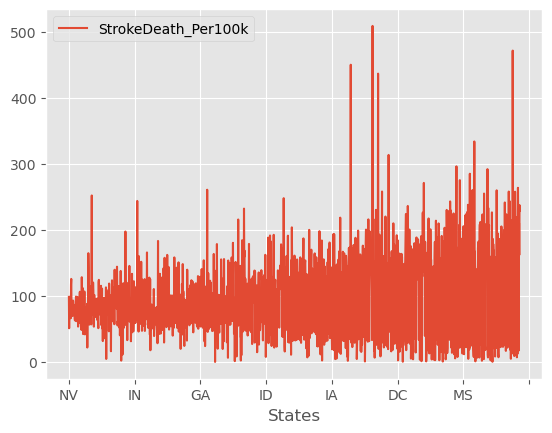

In [96]:
df.plot.line(x="States", y = "StrokeDeath_Per100k")

In [97]:
df['States'].value_counts()

GA    276
AL    145
AR    127
FL    121
CA     98
IL     96
IN     89
IA     82
KS     70
CO     63
NC     57
MS     53
LA     52
TX     50
AK     38
AZ     27
TN     27
ID     26
CT     25
VA     21
MO     17
NY     17
SC     15
KY     15
MD     13
MI     12
OK     12
MN     10
NE      8
HI      7
WI      6
PA      6
DE      6
DC      6
OH      5
AS      3
MP      3
MA      3
OR      3
WY      1
NV      1
NJ      1
MT      1
GU      1
WA      1
Name: States, dtype: int64

In [98]:
# the length of the unique value in the column(States) is 45 states.
len(df.States.value_counts())

45

In [99]:
# log10 is a condence valuse of a larger number.

import numpy as np
df['death_log']= np.log10(df['StrokeDeath_Per100k'])
print(df['death_log'])

0       1.993436
1       1.707570
3       1.887617
4       1.949878
5       1.924796
          ...   
1712    1.238046
1713    2.322839
1714    2.209515
1715    2.375664
1716    2.359266
Name: death_log, Length: 1716, dtype: float64


c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='StrokeDeath_Per100k', ylabel='Ethnicity'>

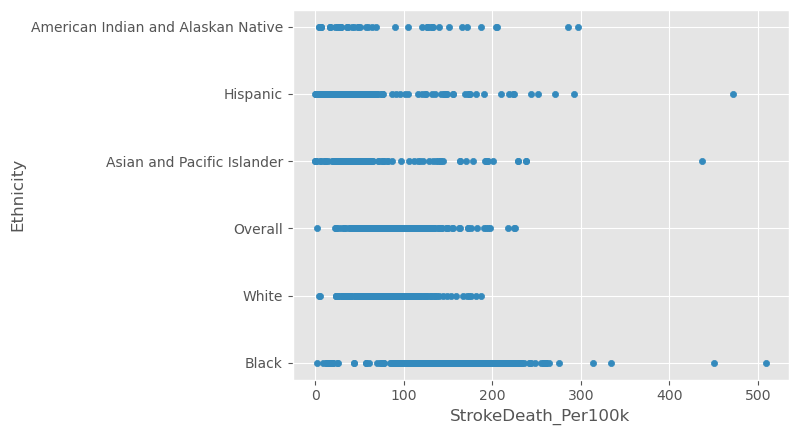

In [109]:
import numpy as np
df.plot(kind='scatter',
        x='StrokeDeath_Per100k',
        y="Ethnicity")


#df.death_log.hist(bins=[0,25,50,75,100,125,150,175,300,400])

<Axes: xlabel='StrokeDeath_Per100k', ylabel='Ethnicity'>

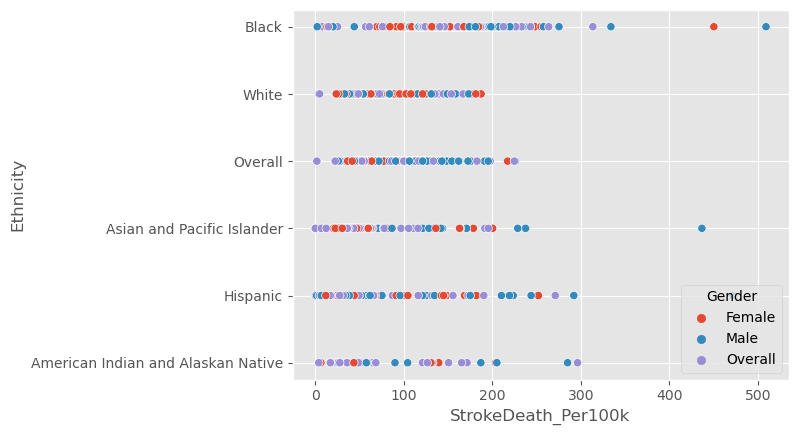

In [110]:
sns.scatterplot(x='StrokeDeath_Per100k',
                y="Ethnicity",
                hue= 'Gender',
                data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

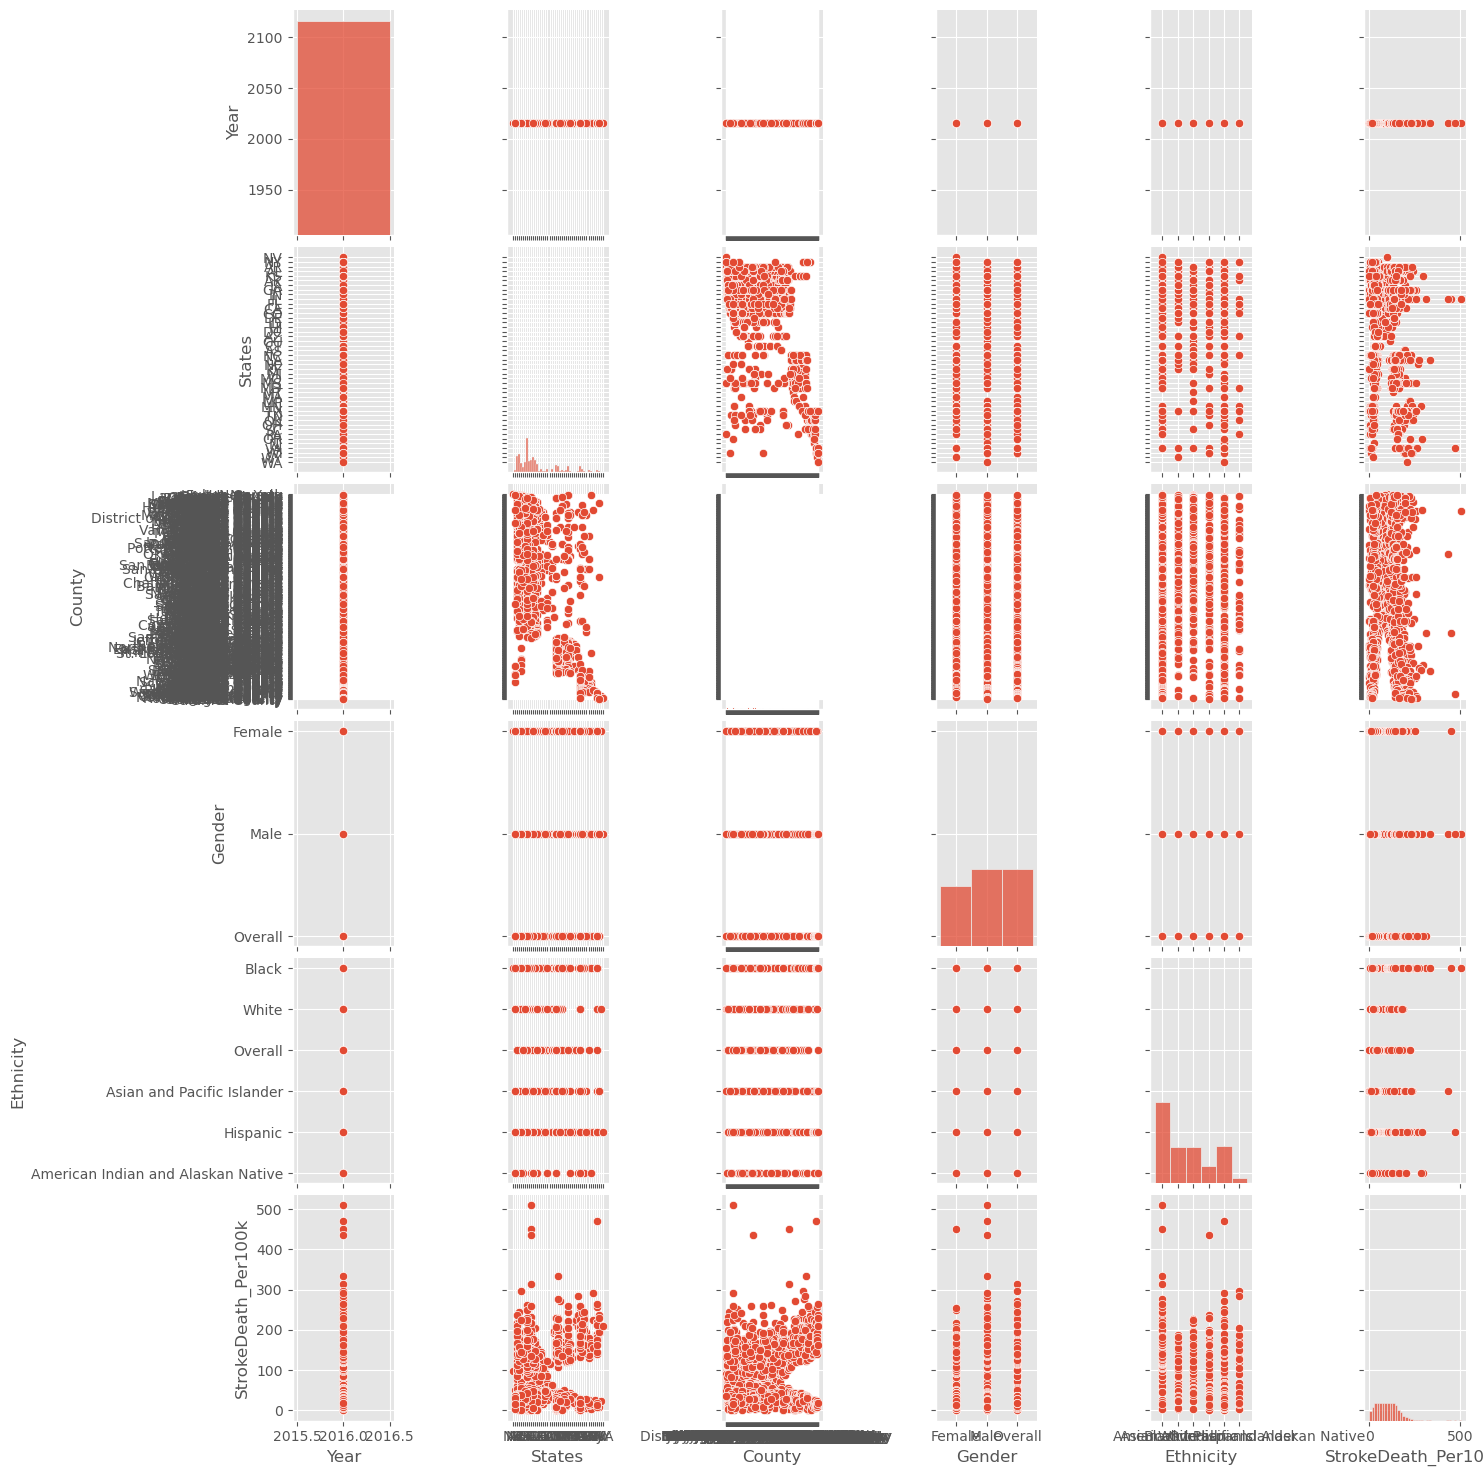

In [123]:
# Compare features using pairplot.
sns.pairplot(df, vars=['Year', 'States', 'County', 'Gender', 'Ethnicity', 'StrokeDeath_Per100k'])
plt.show

# hue is not working.
#sns.pairplot(df, vars=['Year', 'States', 'County', 'Gender', 'Ethnicity', 'StrokeDeath_Per100k'], hue= 'Gender')

Text(0.5, 0, '(Death Rate)')

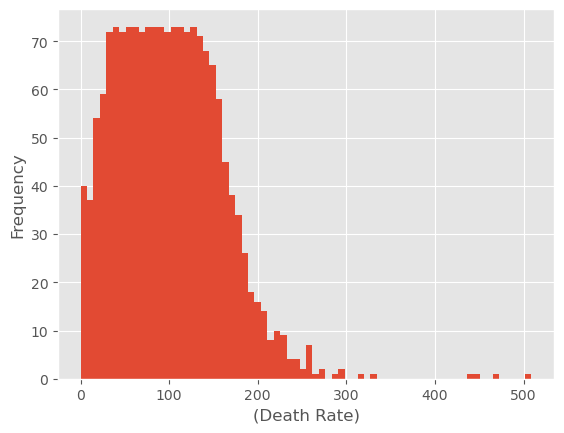

In [142]:
# Distribution 
ax = df['StrokeDeath_Per100k'].plot(kind='hist', bins=70)
ax.set_xlabel('(Death Rate)')


# df.StrokeDeath_Per100k.hist(bins=250)

In [102]:
# Count for duplicate value or check for number of the same value may have been repeated in the column.
# there is no duplicate value in StrokeDeath_Per100k. 
df['StrokeDeath_Per100k'].value_counts()

98.5     1
33.1     1
127.8    1
174.5    1
132.6    1
        ..
66.0     1
101.8    1
20.0     1
53.1     1
228.7    1
Name: StrokeDeath_Per100k, Length: 1716, dtype: int64

In [136]:
df.head()

,index,Year,States,County,StrokeDeath_Per100k,Gender,Ethnicity,LocationID,States_ID,Counties_ID,death_log
0,0,2016,NV,Nevada,98.5,Female,Black,32,10.0,481.0,1.993436
1,1,2016,NY,New York,51.0,Male,White,36,47.0,625.0,1.707570
3,3,2016,AR,Fulton County,77.2,Female,White,5049,15.0,1021.0,1.887617
4,5,2016,AL,Lauderdale County,89.1,Male,Overall,1077,29.0,1584.0,1.949878
5,7,2016,KS,Cowley County,84.1,Male,Overall,20035,17.0,1939.0,1.924796


FEMALE POPULATION BELOW:

In [143]:
# FEMALE population.
df.query('Gender == "Female"')

,index,Year,States,County,StrokeDeath_Per100k,Gender,Ethnicity,LocationID,States_ID,Counties_ID,death_log
0,0,2016,NV,Nevada,98.5,Female,Black,32,10.0,481.0,1.993436
3,3,2016,AR,Fulton County,77.2,Female,White,5049,15.0,1021.0,1.887617
7,9,2016,AL,Conecuh County,98.9,Female,White,1035,29.0,1499.0,1.995196
8,10,2016,AK,Kenai Peninsula,66.1,Female,Overall,2122,51.0,110.0,1.820201
13,22,2016,AR,Randolph County,81.5,Female,White,5121,15.0,999.0,1.911158
...,...,...,...,...,...,...,...,...,...,...,...
1687,52119,2016,VA,Chesterfield County,16.6,Female,Hispanic,51041,40.0,2764.0,1.220108
1700,54379,2016,VA,Covington City,181.4,Female,White,51580,40.0,2908.0,2.258637
1701,54412,2016,WY,Campbell County,23.9,Female,White,56005,14.0,889.0,1.378398
1707,56266,2016,VA,Richmond City,12.1,Female,Hispanic,51760,40.0,2947.0,1.082785


Text(0.5, 0, 'Average Death of female')

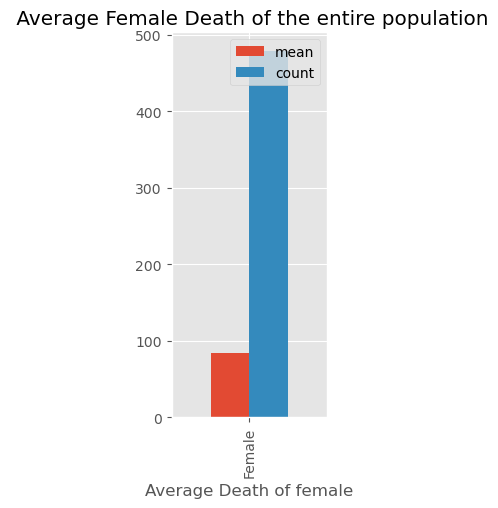

In [200]:
Female_Death_AvgRate = df.query('Gender == "Female"').groupby('Gender') ['StrokeDeath_Per100k'] \
    .agg(['mean', 'count']) \
    .plot(kind='bar', figsize=(2,5), title=' Average Female Death of the entire population')
Female_Death_AvgRate.set_xlabel('Average Death of female')

Text(0.5, 0, 'Average Death of female')

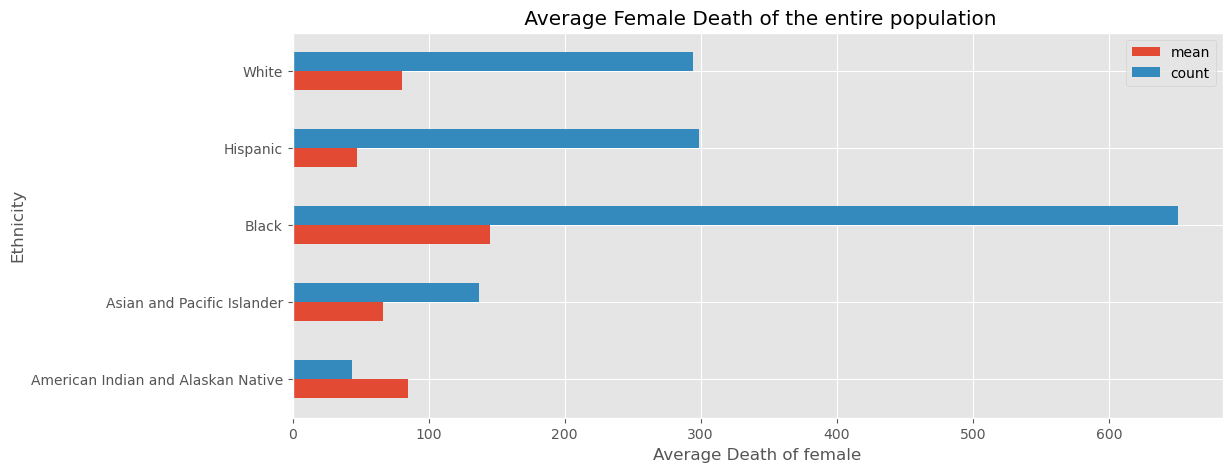

In [189]:
Female_Death_AvgRate = df.query('Ethnicity != "Overall"').groupby('Ethnicity') ['StrokeDeath_Per100k'] \
    .agg(['mean', 'count']) \
    .plot(kind='barh', figsize=(12,5), title=' Average Female Death of the entire population')
Female_Death_AvgRate.set_xlabel('Average Death of female')

In [178]:
# HISPANIC FEMALE on the entire pop.
HFemale_Death_Rate = df.query('Gender == "Female" and Ethnicity == "Hispanic"') ['StrokeDeath_Per100k'] \
.agg(['sum', 'mean', 'max', 'min'])
print("Stat on hispanic female death")
HFemale_Death_Rate

Stat on hispanic female death


sum     4373.300000
mean      46.524468
max      252.100000
min        0.300000
Name: StrokeDeath_Per100k, dtype: float64

In [170]:
# WHITE FEMALE on the entire pop.
WFemale_Death_Rate = df.query('Gender == "Female" and Ethnicity == "White"') ['StrokeDeath_Per100k'] \
.agg(['sum', 'mean', 'max', 'min'])
print("Stat on white female death")
WFemale_Death_Rate
    


Stat on white female death


sum     8433.50000
mean      77.37156
max      187.40000
min       23.90000
Name: StrokeDeath_Per100k, dtype: float64

In [177]:
# BLACK FEMALE on the entire pop.
BFemale_Death_Rate = df.query('Gender == "Female" and Ethnicity == "Black"') ['StrokeDeath_Per100k'] \
.agg(['sum', 'mean', 'max', 'min'])
print("Stat on black female death")
BFemale_Death_Rate

Stat on black female death


sum     17388.400000
mean      131.730303
max       450.100000
min        13.400000
Name: StrokeDeath_Per100k, dtype: float64

In [176]:
# OVERALL FEMALE on the entire pop.
OVFemale_Death_Rate = df.query('Gender == "Female" and Ethnicity == "Overall"') ['StrokeDeath_Per100k'] \
.agg(['sum', 'mean', 'max', 'min'])
print("Stat on overall female death")
OVFemale_Death_Rate

Stat on overall female death


sum     7239.100000
mean      84.175581
max      217.300000
min       24.100000
Name: StrokeDeath_Per100k, dtype: float64

MALE POPULATION BELOW:

In [165]:
# MALE population.
df.query('Gender == "Male"')

,index,Year,States,County,StrokeDeath_Per100k,Gender,Ethnicity,LocationID,States_ID,Counties_ID,death_log
1,1,2016,NY,New York,51.0,Male,White,36,47.0,625.0,1.707570
4,5,2016,AL,Lauderdale County,89.1,Male,Overall,1077,29.0,1584.0,1.949878
5,7,2016,KS,Cowley County,84.1,Male,Overall,20035,17.0,1939.0,1.924796
10,16,2016,GA,Colquitt County,125.7,Male,Overall,13071,31.0,62.0,2.099335
12,21,2016,IL,Christian County,86.2,Male,Overall,17021,34.0,1824.0,1.935507
...,...,...,...,...,...,...,...,...,...,...,...
1708,56298,2016,VA,Harrisonburg City,175.1,Male,Hispanic,51660,40.0,932.0,2.243286
1713,56896,2016,WA,Okanogan County,210.3,Male,Hispanic,53047,6.0,3198.0,2.322839
1714,56899,2016,VA,Martinsville City,162.0,Male,Overall,51690,40.0,934.0,2.209515
1715,57077,2016,WI,Shawano County,237.5,Male,Asian and Pacific Islander,55115,41.0,3069.0,2.375664


In [149]:
Male_Death_AvgRate = df.query('Gender == "Male"').groupby('Gender') ['StrokeDeath_Per100k'] \
    .agg(['mean', 'count'])
Male_Death_AvgRate

,mean,count
Gender,,
Male,116.523312,622
